In [46]:
import cv2
import numpy as np
import skimage as ski
from scipy.misc import imread, imsave, imresize
from scipy import signal as sig

import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from skimage import img_as_ubyte
from IPython.display import Image
%matplotlib inline

2.1

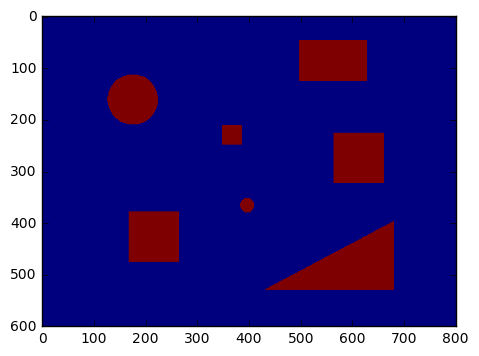

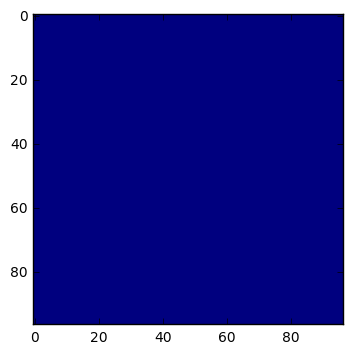

In [30]:
img1 = cv2.imread('image1.tif', 0)
pat1 = cv2.imread('pattern1.tif', 0)

img1_view = img1 * 255
pat1_view = pat1 * 255
plt.imshow(img1_view)
plt.show()
plt.imshow(pat1_view)
plt.show()
# obj = cv2.imread('image1.jpg');
# plt.imshow(obj);



In [31]:
print img1
print pat1

[[0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 ..., 
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]
 [0 0 0 ..., 0 0 0]]
[[1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 ..., 
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]
 [1 1 1 ..., 1 1 1]]


2.2)

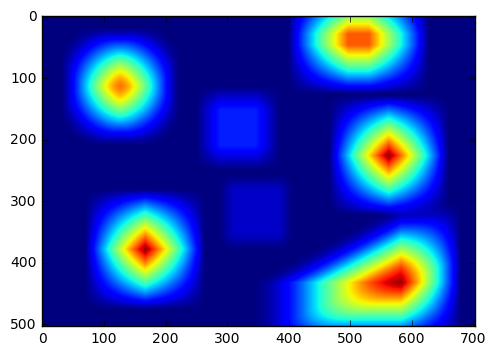

In [32]:
res1 = cv2.matchTemplate(img1,pat1,cv2.TM_CCORR)
plt.imshow(res1)
plt.show()

2.3

9409.0


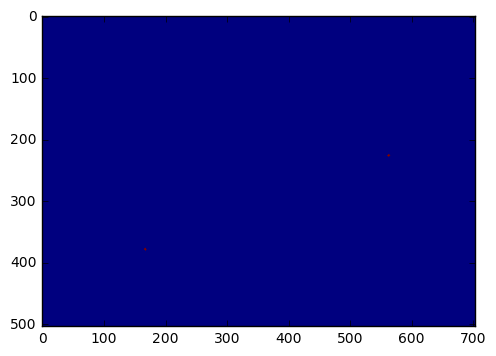

In [33]:
print np.amax(res1)
ret,thresh1 = cv2.threshold(res1,9200.0,9409.0,cv2.THRESH_BINARY)
plt.imshow(thresh1)

2.4
# H1
## H2

* bp1


**bold**


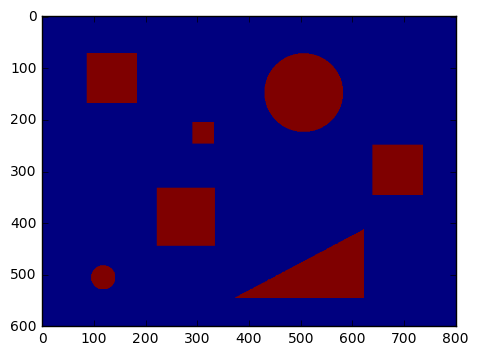

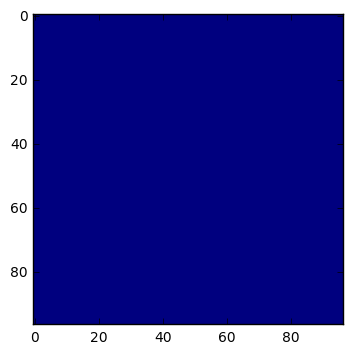

In [34]:
img2 = cv2.imread('image2.tif' , 0)
img2_view = img2 * 255

plt.imshow(img2_view)
plt.show()
plt.imshow(pat1_view)
plt.show()

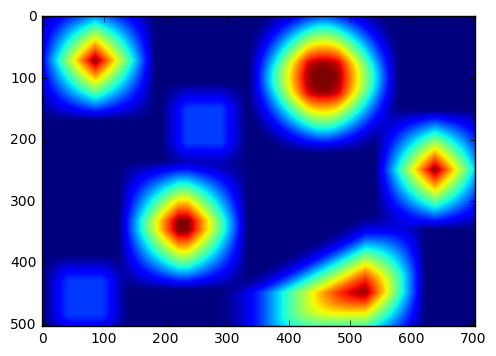

In [35]:
res2 = cv2.matchTemplate(img2,pat1,cv2.TM_CCORR)
plt.imshow(res2)
plt.show()

9409.0


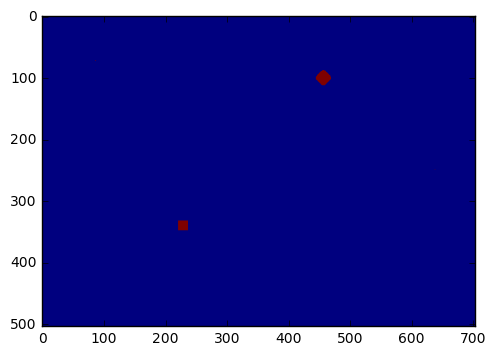

In [37]:
print np.amax(res2)
ret2,thresh2 = cv2.threshold(res2,9400.0,9409.0,cv2.THRESH_BINARY)
plt.imshow(thresh2)

The square pattern matches the large square. But we also get a full match for the circle as well.
Since the circle completely overlaps the pattern the correlation formula results in a max value again. 
This gives a false match to the circle, (or any other object larger than the square pattern)

2.5)

In [82]:
print pat1.shape
pat1_bordered=cv2.copyMakeBorder( pat1*1.0, 1, 1, 1, 1, cv2.BORDER_CONSTANT, value=-1 );
print pat1_bordered.shape
pat1_bordered

pat1_bordered*=1.0
im

(97L, 97L)
(99L, 99L)


array([[-1., -1., -1., ..., -1., -1., -1.],
       [-1.,  1.,  1., ...,  1.,  1., -1.],
       [-1.,  1.,  1., ...,  1.,  1., -1.],
       ..., 
       [-1.,  1.,  1., ...,  1.,  1., -1.],
       [-1.,  1.,  1., ...,  1.,  1., -1.],
       [-1., -1., -1., ..., -1., -1., -1.]])

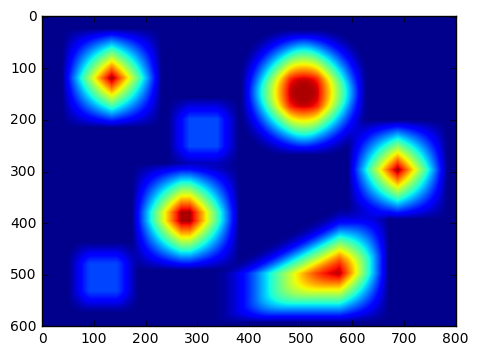

In [83]:
grad = signal.convolve2d(img2*1.0, pat1_bordered*1.0, boundary='symm', mode='same')

plt.imshow(grad)
plt.show()

9409.0


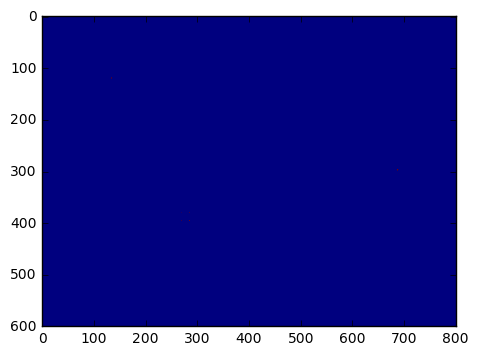

In [84]:
print np.amax(grad)



# for row in grad:
#     for val in row:
        
grad_tresh = grad[:]>9200

plt.imshow(grad_tresh)
plt.show()
pat2 = cv2.imread('pattern2.tif')

In [85]:
print grad.shape
print np.amax(grad)

(600L, 800L)
9409.0


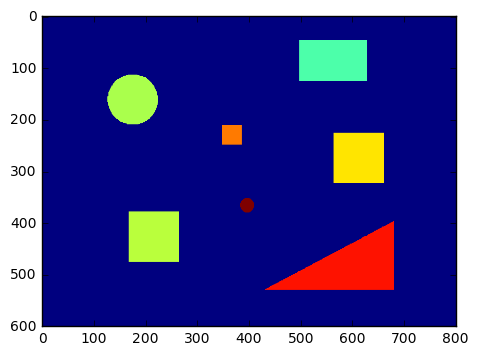

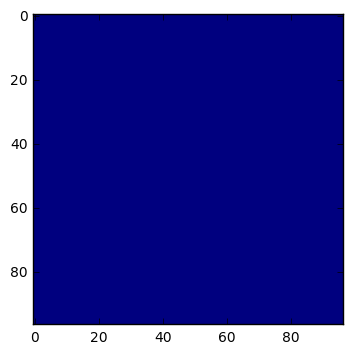

In [164]:
img3 = cv2.imread('image3.tif',0)
pat2 = cv2.imread('pattern2.tif',0)

plt.imshow(img3)
plt.show()
plt.imshow(pat2)
plt.show()

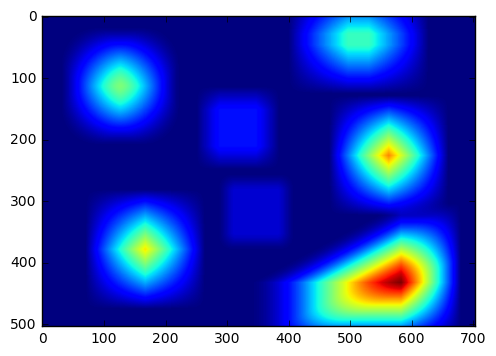

In [165]:
res3 = cv2.matchTemplate(img3,pat2,cv2.TM_CCORR)
plt.imshow(res3)
plt.show()

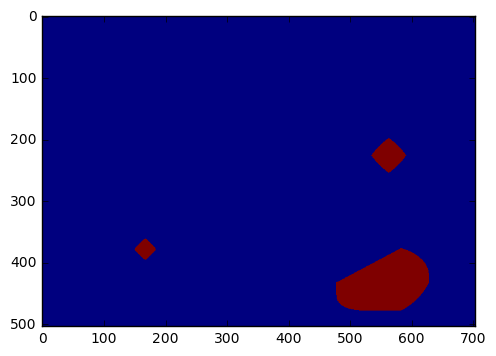

2.38784e+08


In [172]:
thresh3 = (res3[:] > 1.3e+08)
plt.imshow(thresh3)
plt.show()
print np.amax(res3)

In [173]:
print res3.shape
print img3.shape

(504L, 704L)
(600L, 800L)


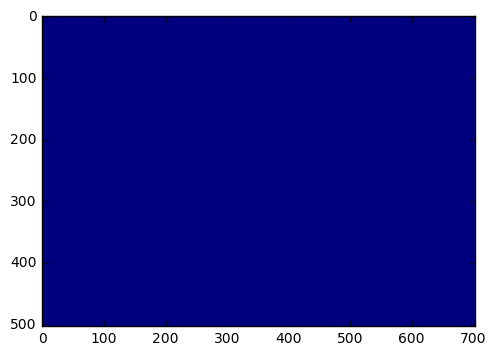

True


In [179]:
print 97*97*130*130
# 159012100
thresh3 = (res3[:] > 159002100 ) &  (res3[:] <159022100 )

plt.imshow(thresh3)
plt.show()
print np.amax(thresh3)

# Section 3

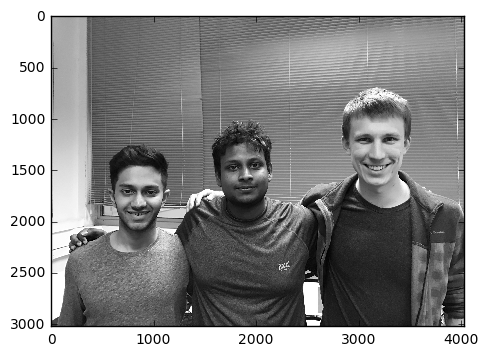

(3024L, 4032L)


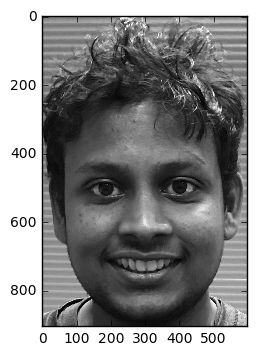

(905L, 598L)


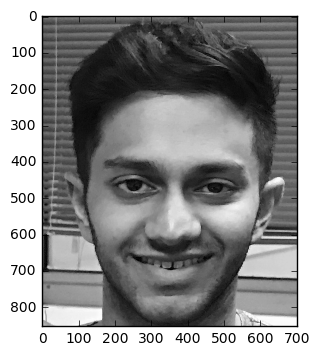

(853L, 701L)


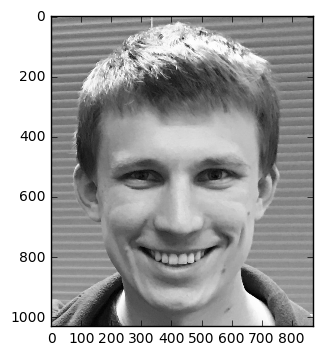

(1031L, 871L)


In [225]:
img1f = cv2.imread('IMG_2118.jpg', 0)
pat1f = cv2.imread('IMG_2119.jpg', 0)
pat2f = cv2.imread('f2.jpg', 0)
pat3f = cv2.imread('f3.jpg', 0)

plt.imshow(img1f, cmap = 'gray')
plt.show()
print img1f.shape

plt.imshow(pat1f, cmap ='gray')
plt.show()
print pat1f.shape

plt.imshow(pat2f, cmap ='gray')
plt.show()
print pat2f.shape

plt.imshow(pat3f, cmap ='gray')
plt.show()
print pat3f.shape

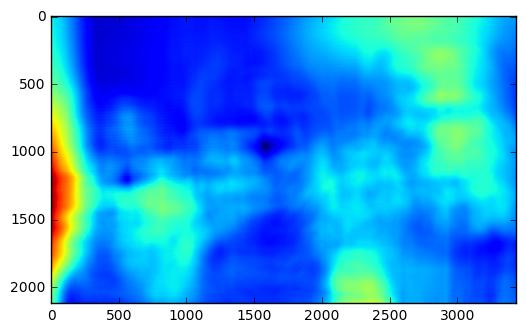

In [227]:
resf1 = cv2.matchTemplate(img1f,pat1f,cv2.TM_SQDIFF)
plt.imshow(resf1)
plt.show()

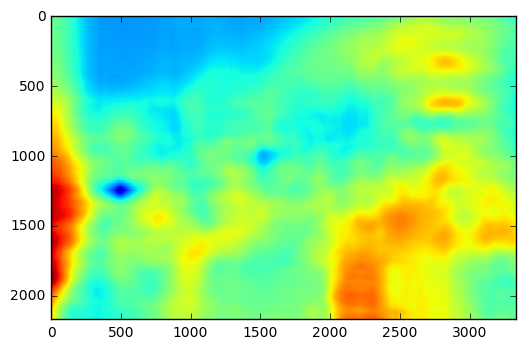

In [228]:
resf2 = cv2.matchTemplate(img1f,pat2f,cv2.TM_SQDIFF)
plt.imshow(resf2)
plt.show()

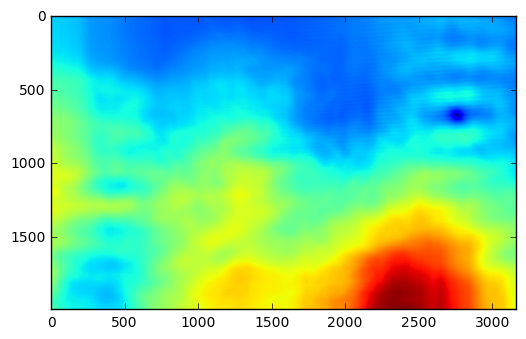

In [229]:
resf3 = cv2.matchTemplate(img1f,pat3f,cv2.TM_SQDIFF)
plt.imshow(resf3)
plt.show()

In [214]:
print resf3.shape
print 'row', np.argmin(resf3)/3162
print 'col', np.argmin(resf3)%3162

(1994L, 3162L)
row 679
col 2753


In [230]:
from matplotlib.patches import Rectangle

def show_rectangle(img, pat, res):
#     img_plt=plt.imshow(img)
    loc=np.argmin(res)
    x, y = loc/res.shape[1] , loc%res.shape[1]
    currentAxis = plt.gca()
    width=pat.shape[1]
    height=pat.shape[0]
    currentAxis.add_patch(Rectangle((y, x), width,height , facecolor="green"))
    plt.imshow(img, cmap='gray')


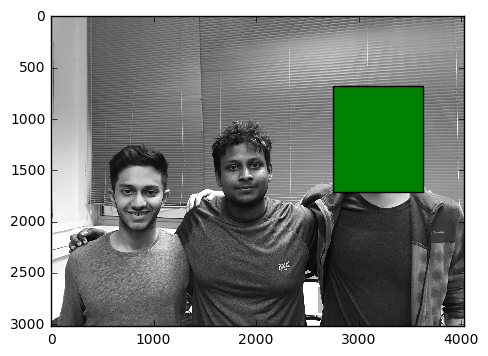

In [222]:
show_rectangle(img1f, pat3f, resf3)

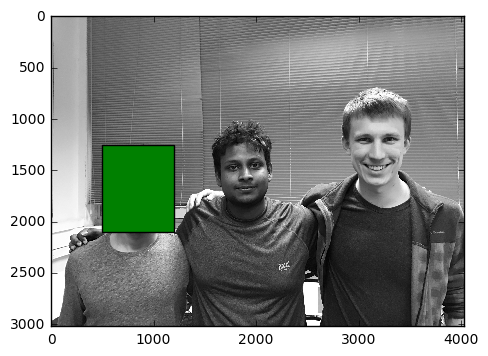

In [231]:
show_rectangle(img1f, pat2f, resf2)

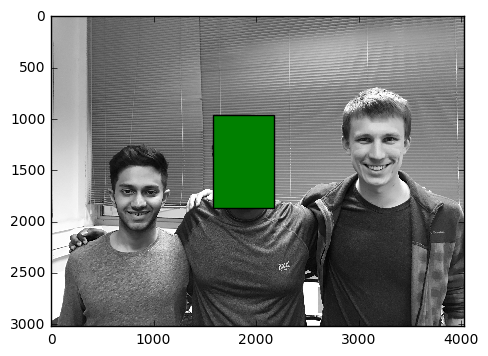

In [232]:
show_rectangle(img1f, pat1f, resf1)

3.7 scaled search